In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import linear_model
import seaborn as sn
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef
from sklearn.metrics import roc_curve
import glob
import os
import pandas as pd

In [2]:
folder_name = 'data'
file_type = 'csv'
seperator =','
df = pd.concat([pd.read_csv(f, sep=seperator) for f in glob.glob(folder_name + "/*."+file_type)],ignore_index=True)

In [3]:
df.dropna(subset=['Actiwatch activity counts','Actiware classification', 'Apple Watch ENMO'], inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48909 entries, 15 to 49310
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   timestamp                  48909 non-null  object 
 1   Actiwatch activity counts  48909 non-null  float64
 2   Actiware classification    48909 non-null  float64
 3   Apple Watch ENMO           48909 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.9+ MB
None


In [4]:
df.describe()

,Actiwatch activity counts,Actiware classification,Apple Watch ENMO
count,48909.000000,48909.000000,48909.000000
mean,3.670265,0.079454,0.006038
std,22.043379,0.270448,0.018776
min,0.000000,0.000000,0.000505
25%,0.000000,0.000000,0.001893
50%,0.000000,0.000000,0.003015
75%,0.000000,0.000000,0.004701
max,827.000000,1.000000,1.187258


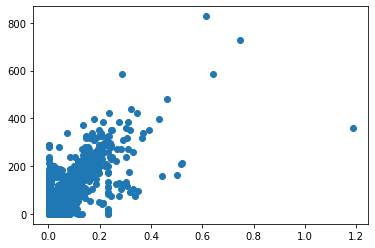

In [5]:
X =df.iloc[:,3].values.reshape(-1, 1)
y=df.iloc[:,1].values.reshape(-1, 1)

plt.scatter(X, y)
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [7]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from matplotlib import pyplot
# load dataset
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

D:\Ana\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
D:\Ana\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
D:\Ana\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Accuracy: 0.922 (0.001)


In [8]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

D:\Ana\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Ana\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Ana\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Ana\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Ana\lib\s

[0.8974306549444558, 0.9180808287330471, 0.9199209432290602, 0.9223062768350031, 0.9233967150548626, 0.9222381244462619, 0.9221018196687794, 0.9221018196687794, 0.921965514891297, 0.9229878007224154, 0.9229196483336741, 0.9234648674436039, 0.9233285626661214, 0.9232604102773803, 0.923192257888639, 0.923192257888639, 0.9235330198323451, 0.9233967150548626, 0.9234648674436039, 0.9237374769985688, 0.9236011722210864, 0.9238737817760513, 0.92380562938731, 0.9240100865535337, 0.9243508484972398]


Text(0, 0.5, 'Testing Accuracy')

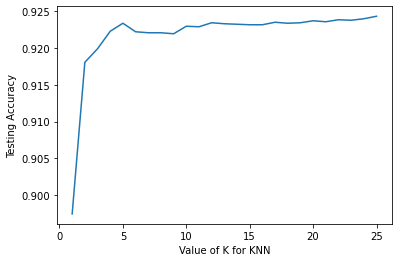

In [9]:
# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [10]:
Apple_pred = knn.predict(X)
df.dropna(subset=['Actiwatch activity counts','Actiware classification'], inplace=True)
df['Apple_pred'] = Apple_pred

print(df)
df.to_csv('new_df.csv')

                 timestamp  Actiwatch activity counts  \
15           1/1/2000 1:20                        0.0   
16           1/1/2000 1:21                       24.0   
17           1/1/2000 1:21                        3.0   
18           1/1/2000 1:21                        0.0   
19           1/1/2000 1:21                        3.0   
...                    ...                        ...   
49306  28/01/2000 08:56:30                      113.0   
49307  28/01/2000 08:56:45                       79.0   
49308  28/01/2000 08:57:00                       88.0   
49309  28/01/2000 08:57:15                       73.0   
49310  28/01/2000 08:57:30                      208.0   

       Actiware classification  Apple Watch ENMO  Apple_pred  
15                         1.0          0.007234         0.0  
16                         1.0          0.030109        46.0  
17                         1.0          0.008785         0.0  
18                         1.0          0.007893         0.0  


In [11]:
data1=pd.read_csv('new_df.csv')
print(data1.describe())

         Unnamed: 0  Actiwatch activity counts  Actiware classification  \
count  48909.000000               48909.000000             48909.000000   
mean   24677.156168                   3.670265                 0.079454   
std    14237.276164                  22.043379                 0.270448   
min       15.000000                   0.000000                 0.000000   
25%    12328.000000                   0.000000                 0.000000   
50%    24691.000000                   0.000000                 0.000000   
75%    37009.000000                   0.000000                 0.000000   
max    49310.000000                 827.000000                 1.000000   

       Apple Watch ENMO    Apple_pred  
count      48909.000000  48909.000000  
mean           0.006038      2.033961  
std            0.018776     15.461641  
min            0.000505      0.000000  
25%            0.001893      0.000000  
50%            0.003015      0.000000  
75%            0.004701      0.000000  
max 

In [12]:
x = data1['Apple_pred']
#for i in range:
for i in range(15,1520):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [13]:
for i in range(1541,3210):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [14]:
for i in range(3231,5297):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [15]:
for i in range(5322,7305):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [16]:
for i in range(7316,8858):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [17]:
for i in range(8864,10973):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [18]:
for i in range(10981,12655):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [19]:
for i in range(12669,14359):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [20]:
for i in range(14377,15868):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [21]:
for i in range(15886,18292):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [22]:
for i in range(18318,20189):  
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [23]:
for i in range(20218,22027):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [24]:
for i in range(22047,23992):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [25]:
for i in range(24011,25521):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [26]:
for i in range(25543,27618):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [27]:
for i in range(27636,29223):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [28]:
for i in range(29230,31062):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [29]:
for i in range(31085,33048):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [30]:
for i in range(33060,36015):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [31]:
for i in range(36030,37917):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [32]:
for i in range(37933,39318):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [33]:
for i in range(39333,41774):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [34]:
for i in range(41783,43231):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [35]:
for i in range(43241,45234):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [36]:
for i in range(45246,46842):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [37]:
for i in range(46857,48296):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [38]:
for i in range(48300,48893):
    data1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if data1['Apple_total_counts'][i]>=20:
        data1.loc[i,'Apple_classification']=1
    else:
        data1.loc[i,'Apple_classification']=0

In [39]:
data1.dropna(subset=['Apple_total_counts'], inplace=True)

Confusion Matrix:
[[42360  2285]
 [ 2714  1105]]


<AxesSubplot:>

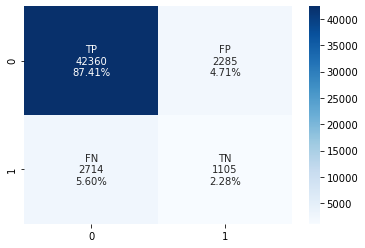

In [40]:
y_true = data1['Actiware classification'].astype(int)
y_pred = data1['Apple_classification'].astype(int)

confusion_matrix_1=confusion_matrix(y_true,y_pred)

print("Confusion Matrix:",confusion_matrix_1,sep="\n")



#plot Confusion_matrix
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in confusion_matrix_1.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in confusion_matrix_1.flatten()/np.sum(confusion_matrix_1)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(confusion_matrix_1, annot=labels, fmt='', cmap='Blues')



In [41]:
#generate classification_report
r_1 = classification_report(y_true,y_pred)
print("classification_report:",r_1,sep="\n")

print("Cohen’s Kappa score:", cohen_kappa_score(y_true, y_pred))
print("Matthews correlation coefficient score:", matthews_corrcoef(y_true, y_pred))


classification_report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     44645
           1       0.33      0.29      0.31      3819

    accuracy                           0.90     48464
   macro avg       0.63      0.62      0.63     48464
weighted avg       0.89      0.90      0.89     48464

Cohen’s Kappa score: 0.2510559435250981
Matthews correlation coefficient score: 0.2515761019795823


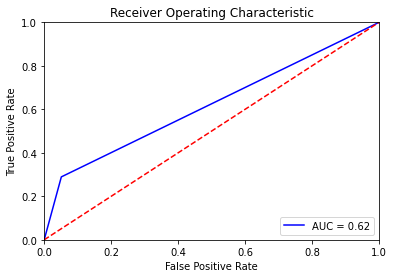

In [42]:
#plot ROC curve
fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()